In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.applications import VGG16

In [2]:
# Load the VGG16 model without the top layers 
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 
224, 3)) 

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


In [5]:
# Find a convolutional layer with weights (let's try the first convolutional layer with weights) 
for layer in model.layers: 
    if 'conv' in layer.name and layer.get_weights():  # Check if layer is convolutional and has weights 
        conv_layer = layer 
        break  # Exit the loop once a suitable layer is found

In [6]:
# Get the weights of the convolutional layer 
weights = conv_layer.get_weights()[0]

In [7]:
# Normalize weights to range 0-1 for visualization 
weights = (weights - weights.min()) / (weights.max() - weights.min()) 

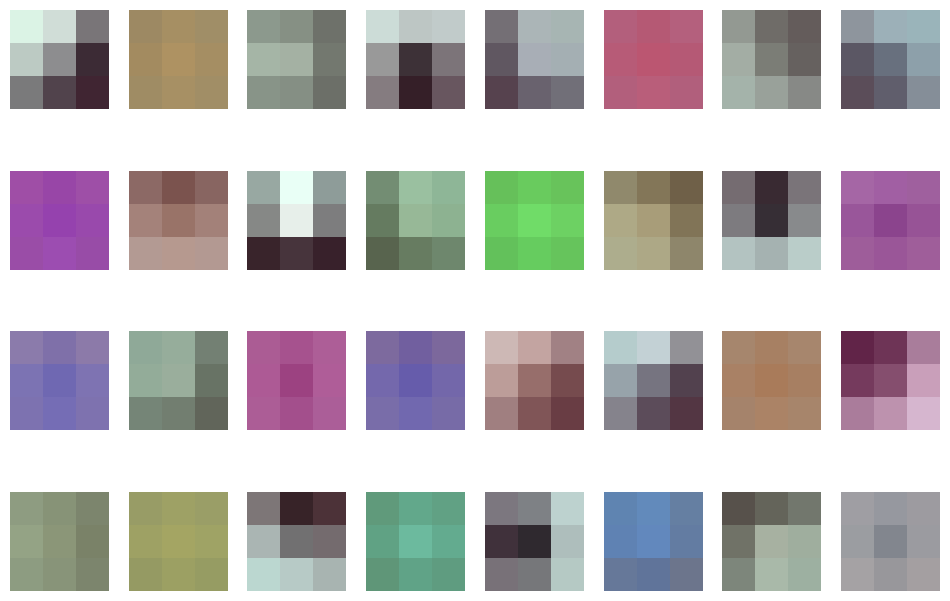

In [8]:
# Visualize the filters 
fig, axs = plt.subplots(4, 8, figsize=(12, 8)) 
for i in range(32):  # Assuming 32 filters in the first layer 
    ax = axs.flat[i] 
    ax.imshow(weights[:, :, :, i], cmap='viridis', 
interpolation='nearest')  # Use viridis colormap and nearest interpolation 
    ax.axis('off') 


In [9]:
# Set title and adjust layout for better visualization 
plt.suptitle('Convolutional Layer Filters (Normalized and Colormapped)', 
fontsize=16) 
plt.tight_layout() 
plt.subplots_adjust(top=0.92)  # Adjust top margin for title 
plt.show() 

<Figure size 640x480 with 0 Axes>